## Importing packages

In [ ]:
#importing the packages
import pandas as pd
import numpy as np
from numpy import arange
from numpy import isnan
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
import math
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, f1_score , precision_score , roc_auc_score ,roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from google.colab import files
uploaded = files.upload()

Saving heart_disease_missing.csv to heart_disease_missing.csv


## [CM1] Data Cleaning and Normalization

In [ ]:
#LOADING
#hd = pd.read_csv('C:/Users/SAM/OneDrive - University of Waterloo/Spring 2021/ECE657A/Assignment 1/heart_disease_missing.csv')
#df_hd = pd.DataFrame(hd)
df_hd= pd.read_csv("heart_disease_missing.csv")
df_hd.describe()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,212.000000,212.000000,212.000000,205.000000,202.000000,212.000000,207.000000,208.000000,212.000000,200.000000,210.000000,212.000000,211.000000,212.000000
mean,54.311321,0.688679,0.957547,131.784610,244.133256,0.132075,0.560386,149.647978,0.344340,1.113106,1.423810,0.731132,2.349112,0.542453
std,9.145339,0.464130,1.022537,18.057222,46.444257,0.339374,0.535149,22.076206,0.476277,1.255908,0.623622,1.038762,0.602117,0.499374
min,29.000000,0.000000,0.000000,93.944184,126.085811,0.000000,0.000000,88.032613,0.000000,-0.185668,0.000000,0.000000,0.858554,0.000000
25%,47.000000,0.000000,0.000000,119.968114,211.969594,0.000000,0.000000,135.946808,0.000000,0.050778,1.000000,0.000000,1.949795,0.000000
50%,55.000000,1.000000,1.000000,130.010256,241.467023,0.000000,1.000000,151.939216,0.000000,0.726060,1.000000,0.000000,2.078759,1.000000
75%,61.000000,1.000000,2.000000,139.965470,272.484222,0.000000,1.000000,165.260092,1.000000,1.816733,2.000000,1.000000,2.970842,1.000000
max,77.000000,1.000000,3.000000,192.020200,406.932689,1.000000,2.000000,202.138041,1.000000,6.157114,2.000000,4.000000,3.277466,1.000000


In [ ]:
df_hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  205 non-null    float64
 4   chol      202 non-null    float64
 5   fbs       212 non-null    int64  
 6   restecg   207 non-null    float64
 7   thalach   208 non-null    float64
 8   exang     212 non-null    int64  
 9   oldpeak   200 non-null    float64
 10  slope     210 non-null    float64
 11  ca        212 non-null    int64  
 12  thal      211 non-null    float64
 13  target    212 non-null    int64  
dtypes: float64(7), int64(7)
memory usage: 23.3 KB


In [ ]:
# rows that contain duplicate value
dup_hd = df_hd.duplicated()
print(dup_hd.any())

#columns with single values
print(df_hd.nunique())

# Finding missing values in the data sets
print(df_hd.isnull().sum())

False
age          41
sex           2
cp            4
trestbps    205
chol        202
fbs           2
restecg       3
thalach     208
exang         2
oldpeak     200
slope         3
ca            5
thal        211
target        2
dtype: int64
age          0
sex          0
cp           0
trestbps     7
chol        10
fbs          0
restecg      5
thalach      4
exang        0
oldpeak     12
slope        2
ca           0
thal         1
target       0
dtype: int64


In [ ]:
#PRE PROCESSING

# Filling in the missing values in NUMERICAL Features using interpolation.

df_hd['trestbps'] = df_hd['trestbps'].interpolate()
df_hd['chol'] = df_hd['chol'].interpolate()
df_hd['thalach'] = df_hd['thalach'].interpolate()
df_hd['oldpeak'] = df_hd['oldpeak'].interpolate()

# Filling in the missing values in CATEGORICAL Features using different approaches.

#-----1. FEATURE : thal
df_hd = df_hd.dropna( how='any', subset=['thal'])

#-----2. FEATURE : restecg
#making the 'restecg' column as the first column.
df_hd = df_hd.reindex(columns=['restecg', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'])

#Make non-missing records as our Training data.
df_hd_train = df_hd.dropna()
#Make missing records as our Testing data.
df_hd_test=pd.concat([df_hd_train,df_hd]).drop_duplicates(keep=False)

#Separate Dependent and Independent features.
x_train = df_hd_train.iloc[:, 1:14]
y_train = df_hd_train.iloc[:, 0]
#Fit our Logistic Regression model.
lr = LogisticRegression()
lr.fit(x_train,y_train)
#predicting the missing data in 'restecg' column.
i=0
for i in range(df_hd_test.shape[0]):
    if math.isnan(df_hd_test.iloc[i,0]):
        input = [df_hd_test.iloc[i,1:14].tolist()]
        x = lr.predict(input)
        df_hd_test.iloc[i,0] = x
#Combining Dependent and Independent features.
df_hd =pd.concat([df_hd_train,df_hd_test])


#-----3. FEATURE : slope
#making the 'slope' column as the first column.
df_hd = df_hd.reindex(columns=['slope', 'restecg', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'ca', 'thal', 'target'])

#Make non-missing records as our Training data.
df_hd_train = df_hd.dropna()
#Make missing records as our Testing data.
df_hd_test=pd.concat([df_hd_train,df_hd]).drop_duplicates(keep=False)

#Separate Dependent and Independent variables.
x_train = df_hd_train.iloc[:, 1:14]
y_train = df_hd_train.iloc[:, 0]
#Fit our Logistic Regression model.
lr1 = LogisticRegression()
lr1.fit(x_train,y_train)
#predicting the missing data in 'slope' column.
i=0
for i in range(df_hd_test.shape[0]):
    if math.isnan(df_hd_test.iloc[i,0]):
        input = [df_hd_test.iloc[i,1:14].tolist()]
        x = lr1.predict(input)
        df_hd_test.iloc[i,0] = x
#Combining Dependent and Independent features.
df_hd =pd.concat([df_hd_train,df_hd_test])

# Rounding of the thal feature to interget values because it is a categorical value and cannot contain deimal values.
df_hd['thal'] = round(df_hd['thal'])
# Taking absolute values of all the values in oldpeak feature to remove the egative values.
df_hd['oldpeak'] = df_hd['oldpeak'].abs()

# Reindexing the columns to there orgiginal order
df_hd = df_hd.reindex(columns=[ 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg','thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'])

print('number of missing values in each column after the preprocessing: /n')
df_hd.isnull().sum()


number of missing values in each column after the preprocessing: /n


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## [CM1] Normalization

In [ ]:
#----------- Z-SCORE TECHNIQUE -----------#

#applying one hot encoding to convert all the categorical variable to dummy variables for scaling them.
df_z_scaled_hd = pd.get_dummies(df_hd,columns = ['sex' , 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

# copy the data and keeping the target attribute away from normalization.
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

stds = StandardScaler()
df_z_scaled_hd[columns_to_scale] = stds.fit_transform(df_z_scaled_hd[columns_to_scale])

print(df_z_scaled_hd)


          age  trestbps      chol   thalach  ...  ca_4  thal_1.0  thal_2.0  thal_3.0
0    2.370992  0.446721 -1.016974 -1.556113  ...     0         0         1         0
1   -1.237580  0.003822  2.111762 -0.636946  ...     0         0         0         1
2   -0.800177 -1.330981 -0.023279  0.108748  ...     0         0         1         0
3   -0.362775 -1.770681  0.977978 -0.311890  ...     0         0         1         0
4    0.293329 -1.209303  1.979236 -0.309589  ...     0         0         0         1
..        ...       ...       ...       ...  ...   ...       ...       ...       ...
62   1.605537  0.450438 -0.099938  0.047929  ...     0         0         1         0
155 -0.909528 -1.705966 -1.020294  0.278727  ...     0         0         0         1
160  0.512031  0.330524  0.590785  1.480297  ...     0         0         1         0
17   0.840083 -0.112293  0.414546 -2.433965  ...     0         0         0         1
26   0.949433  0.433020 -1.238257 -0.271728  ...     0         0 

In [ ]:
#----------- MIN-MAX TECHNIQUE -----------#

# copy the data and keeping the target attribute away from normalization.
df_mm_scaled_hd = pd.get_dummies(df_hd,columns = ['sex' , 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

# apply normalization techniques
for column in columns_to_scale:
    df_mm_scaled_hd[columns_to_scale] = (df_mm_scaled_hd[columns_to_scale] - df_mm_scaled_hd[columns_to_scale].min()) / (df_mm_scaled_hd[columns_to_scale].max() - df_mm_scaled_hd[columns_to_scale].min())    

# view normalized data
print(df_mm_scaled_hd)

          age  trestbps      chol   thalach  ...  ca_4  thal_1.0  thal_2.0  thal_3.0
0    0.979167  0.470641  0.252879  0.244681  ...     0         0         1         0
1    0.291667  0.388835  0.765412  0.420115  ...     0         0         0         1
2    0.375000  0.142289  0.415661  0.562440  ...     0         0         1         0
3    0.458333  0.061073  0.579682  0.482156  ...     0         0         1         0
4    0.583333  0.164763  0.743703  0.482595  ...     0         0         0         1
..        ...       ...       ...       ...  ...   ...       ...       ...       ...
62   0.833333  0.471328  0.403103  0.550832  ...     0         0         1         0
155  0.354167  0.073027  0.252335  0.594882  ...     0         0         0         1
160  0.625000  0.449179  0.516254  0.824216  ...     0         0         1         0
17   0.687500  0.367388  0.487383  0.077133  ...     0         0         0         1
26   0.708333  0.468111  0.216629  0.489821  ...     0         0 

## [CM2] Pair Plot Visualizations

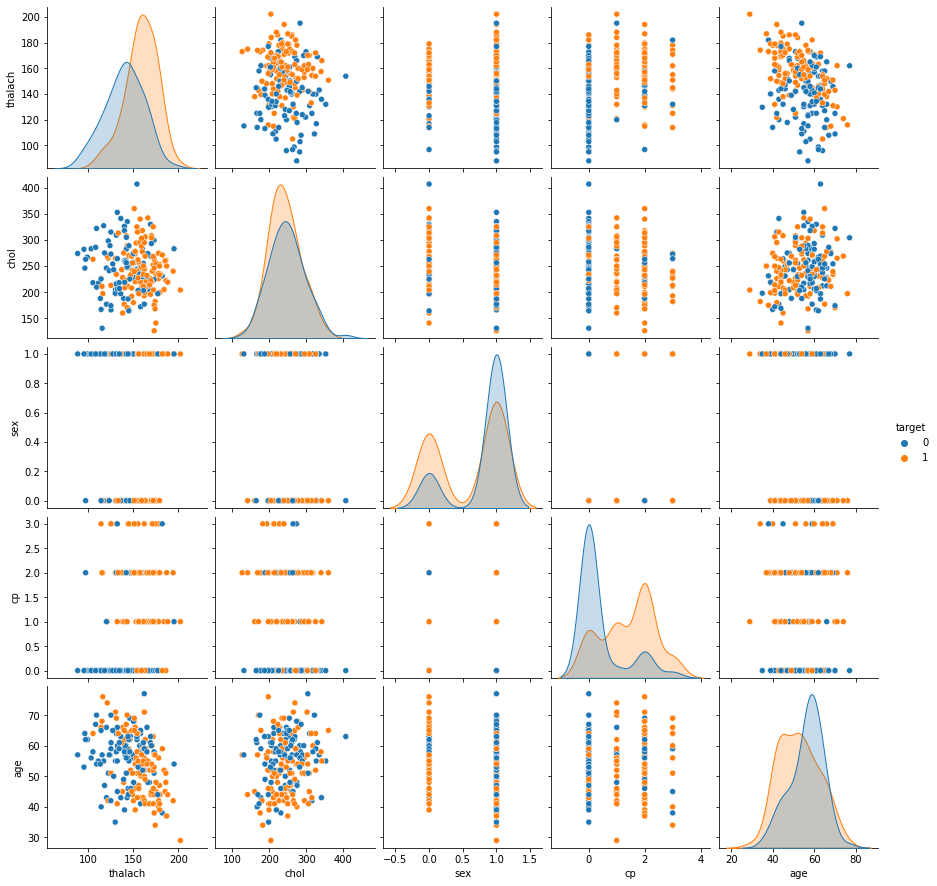

In [ ]:
#pairplot for iris dataset
sns.pairplot(df_hd, vars = ['thalach', 'chol', 'sex', 'cp','age'], 
             hue = 'target')


##[CM3] Correlation and Statistical Measures

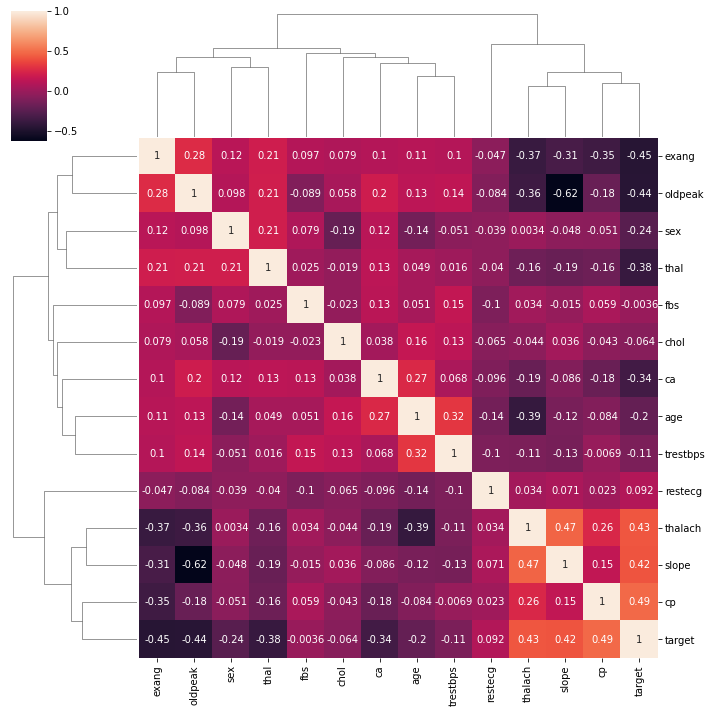

In [ ]:
#clustermap of heart disease dataset
sns.clustermap(df_hd.corr(),annot=True)

In [ ]:
#Calculating mean,variance,kurtosis and skew

In [ ]:
df_hd.mean()

age          54.317536
sex           0.691943
cp            0.952607
trestbps    132.010357
chol        243.893813
fbs           0.132701
restecg       0.568720
thalach     149.841674
exang         0.345972
oldpeak       1.133002
slope         1.417062
ca            0.734597
thal          2.355450
target        0.540284
dtype: float64

In [ ]:
df_hd.var()

age           84.027262
sex            0.214173
cp             1.045362
trestbps     329.725518
chol        2126.715688
fbs            0.115640
restecg        0.284541
thalach      476.556094
exang          0.227353
oldpeak        1.457800
slope          0.387136
ca             1.081607
thal           0.344482
target         0.249560
dtype: float64

In [ ]:
df_hd.kurt()

age        -0.572421
sex        -1.311205
cp         -1.227403
trestbps    0.472414
chol        0.252379
fbs         2.782522
restecg    -1.191437
thalach    -0.142336
exang      -1.589724
oldpeak     1.689021
slope      -0.585027
ca          1.000649
thal       -0.676980
target     -1.992466
dtype: float64

In [ ]:
df_hd.skew()

age        -0.107835
sex        -0.837445
cp          0.473343
trestbps    0.634186
chol        0.323569
fbs         2.180880
restecg     0.102549
thalach    -0.410495
exang       0.652254
oldpeak     1.307114
slope      -0.579313
ca          1.371002
thal       -0.276223
target     -0.162823
dtype: float64

### [CM4]: Dividing the data into a training set and a test set. Train the model with the classifer's default parameters.

In [ ]:
#Training the classifier on RAW data BEFORE preprocessing.
#Slpiting the data into a training set and a test set.
x = df_hd.drop(['target'], axis=1)
y = df_hd['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 98)

# KNeighborsClassifier with default parameters.
knn1 = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
knn1.fit(x_train, y_train)
yhat = knn1.predict(x_test)
print('Accuracy Score of classifier on RAW data BEFORE preprocessing:', accuracy_score(y_test, yhat))


Accuracy Score of classifier on RAW data BEFORE preprocessing: 0.7209302325581395


In [ ]:
# We are using input as Z scaled version of the cleaned data, i.e., df_z_scaled_hd.
#Training the classifier on data AFTER preprocessing.
#Slpiting the data into a training set and a test set.
x = df_z_scaled_hd.drop(['target'], axis=1)
y = df_z_scaled_hd['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 98)

# KNeighborsClassifier with default parameters.
knn0 = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
knn0.fit(x_train, y_train)
yhat = knn0.predict(x_test)
print('Accuracy Score of classifier on data AFTER preprocessing:', accuracy_score(y_test, yhat))

Accuracy Score of classifier on data AFTER preprocessing: 0.813953488372093


### [CM5]: Tuning the Classifier

In [ ]:
# we will be using the output of z-score as the input data now onwards.
#Slpiting the data into a training set and a test set.
x = df_z_scaled_hd.drop(['target'], axis=1)
y = df_z_scaled_hd['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 98)
# dividing the training set into an (90%,10%) split into train and validate sets.
x2_train, x_val, y2_train, y_val = train_test_split(x_train, y_train, test_size = 0.10, random_state = 98)
print('shape of original training set', x_train.shape, y_train.shape)
print('shape of second training set', x2_train.shape, y2_train.shape)
print('shape of validation set', x_val.shape, y_val.shape)
print('shape of testing set', x_test.shape, y_test.shape)

shape of original training set (168, 29) (168,)
shape of second training set (151, 29) (151,)
shape of validation set (17, 29) (17,)
shape of testing set (43, 29) (43,)


In [ ]:
##-------TRAIN_VALIDATE sets-------##
# Training the classifier on second training set and then testing in the Vaidation set.
knn_scores = []
for k in range(1,35):
    knn2 = KNeighborsClassifier(n_neighbors = k)
    knn2.fit(x2_train, y2_train)
    knn_scores.append(knn2.score(x_val, y_val))

knn_scores = [ '%.4f' % elem for elem in knn_scores ]
knn_scores = [float(line) for line in knn_scores]
print(knn_scores)

[0.6471, 0.7647, 0.7647, 0.7647, 0.8235, 0.8824, 0.8235, 0.8235, 0.8824, 0.9412, 0.8235, 0.8824, 0.8824, 0.8824, 0.8235, 0.8824, 0.8235, 0.8824, 0.8235, 0.8235, 0.8235, 0.8235, 0.8235, 0.8235, 0.8235, 0.8235, 0.8235, 0.8235, 0.8235, 0.8235, 0.8235, 0.8235, 0.8235, 0.8235]


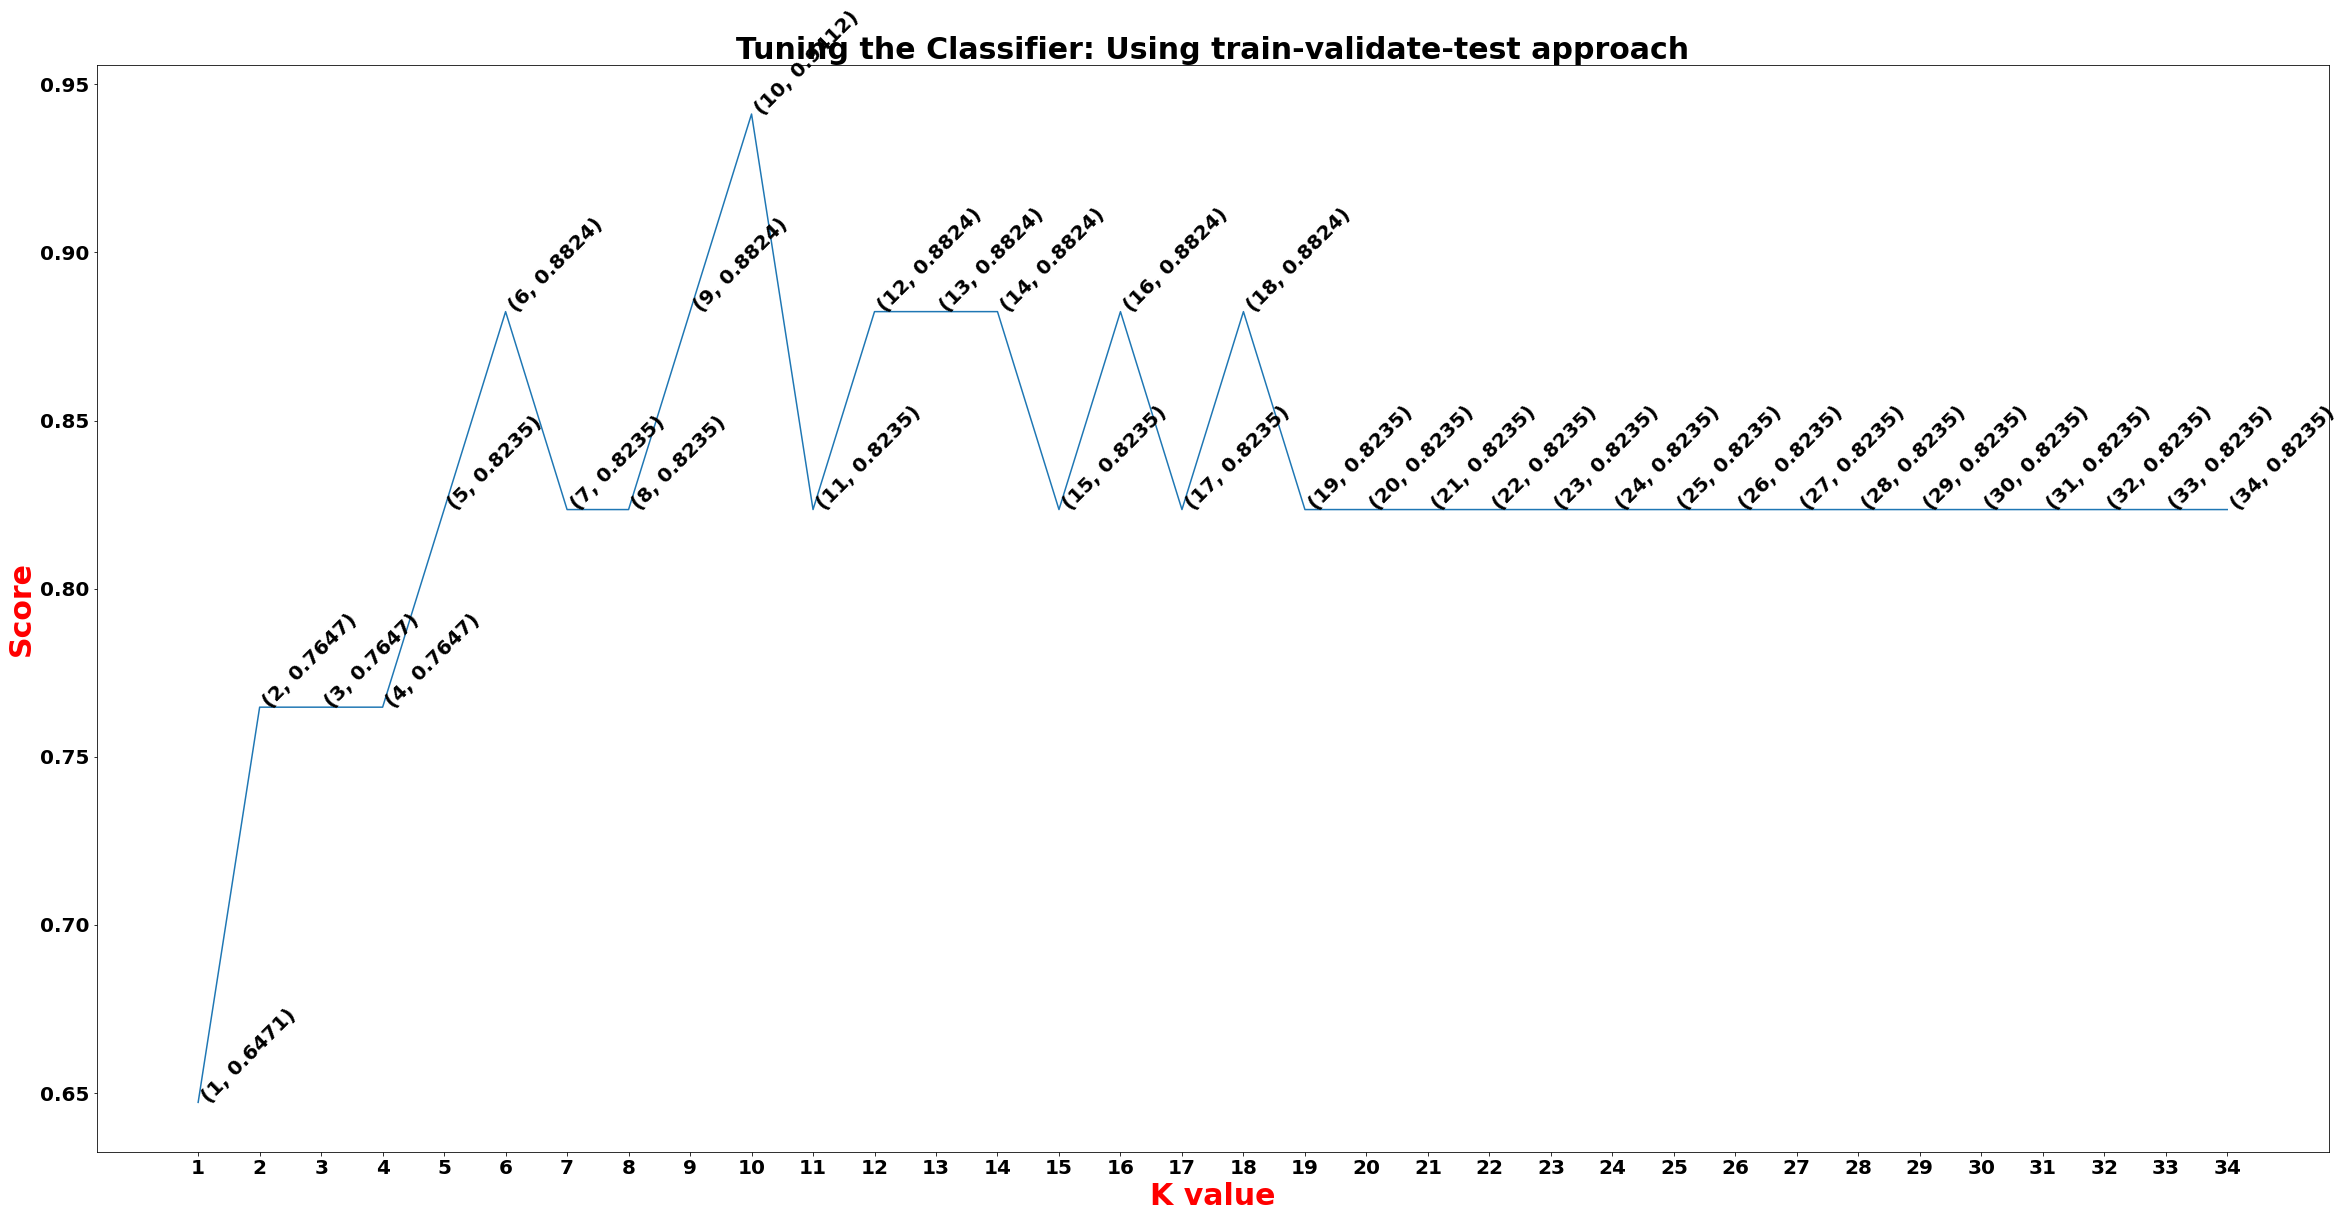

In [ ]:
#ploting the graph
plt.rc('font', size=20)
f, ax = plt.subplots(1, 1, figsize = (40, 20))
plt.plot(range(1,35), knn_scores)
for i in range(1,35):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]), fontsize=20, rotation=45 )
plt.xticks(np.arange(1,35,1))
plt.title("Tuning the Classifier: Using train-validate-test approach", weight='bold',fontsize='30')
plt.xlabel("K value",color='Red',weight='bold',fontsize='30')
plt.ylabel("Score",color='Red',weight='bold',fontsize='30')
plt.show()
plt.rcParams["font.weight"]= "bold"
plt.rcParams["axes.labelweight"] = "bold"


### [CM6]: Fitting the model using the best found parameter.

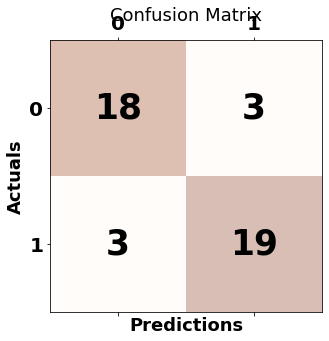

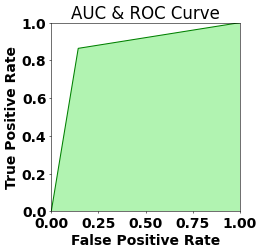

Precision: 0.864
F1 Score: 0.864
Accuracy: 0.860
Recall: 0.864
AUC: 0.860


In [ ]:
# fitting the same model on the original training set and predicting the target on the test set.

##-------TRAIN_TEST sets-------##
#looking at the graph it is clear that the maximum accouracy comes when k = 10. 
#Therefore calculating Accuracy, Precision, Recall & F1-Score for k = 10 of our kNN classifier.
knn3 = KNeighborsClassifier(n_neighbors = 10)
knn3.fit(x_train, y_train)
y_pred = knn3.predict(x_test)
# Calculating the accuracy
acc = accuracy_score(y_test, yhat)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large') 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


#AUC and ROC Curve
auc = metrics.roc_auc_score(y_test, y_pred)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)
plt.figure(figsize=(6, 5), dpi=50)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#Accuracy, Precision, Recall & F1-Score
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('AUC: %.3f' % auc)

### [CM7]: Improving the model by changing and experimenting on other parameters.

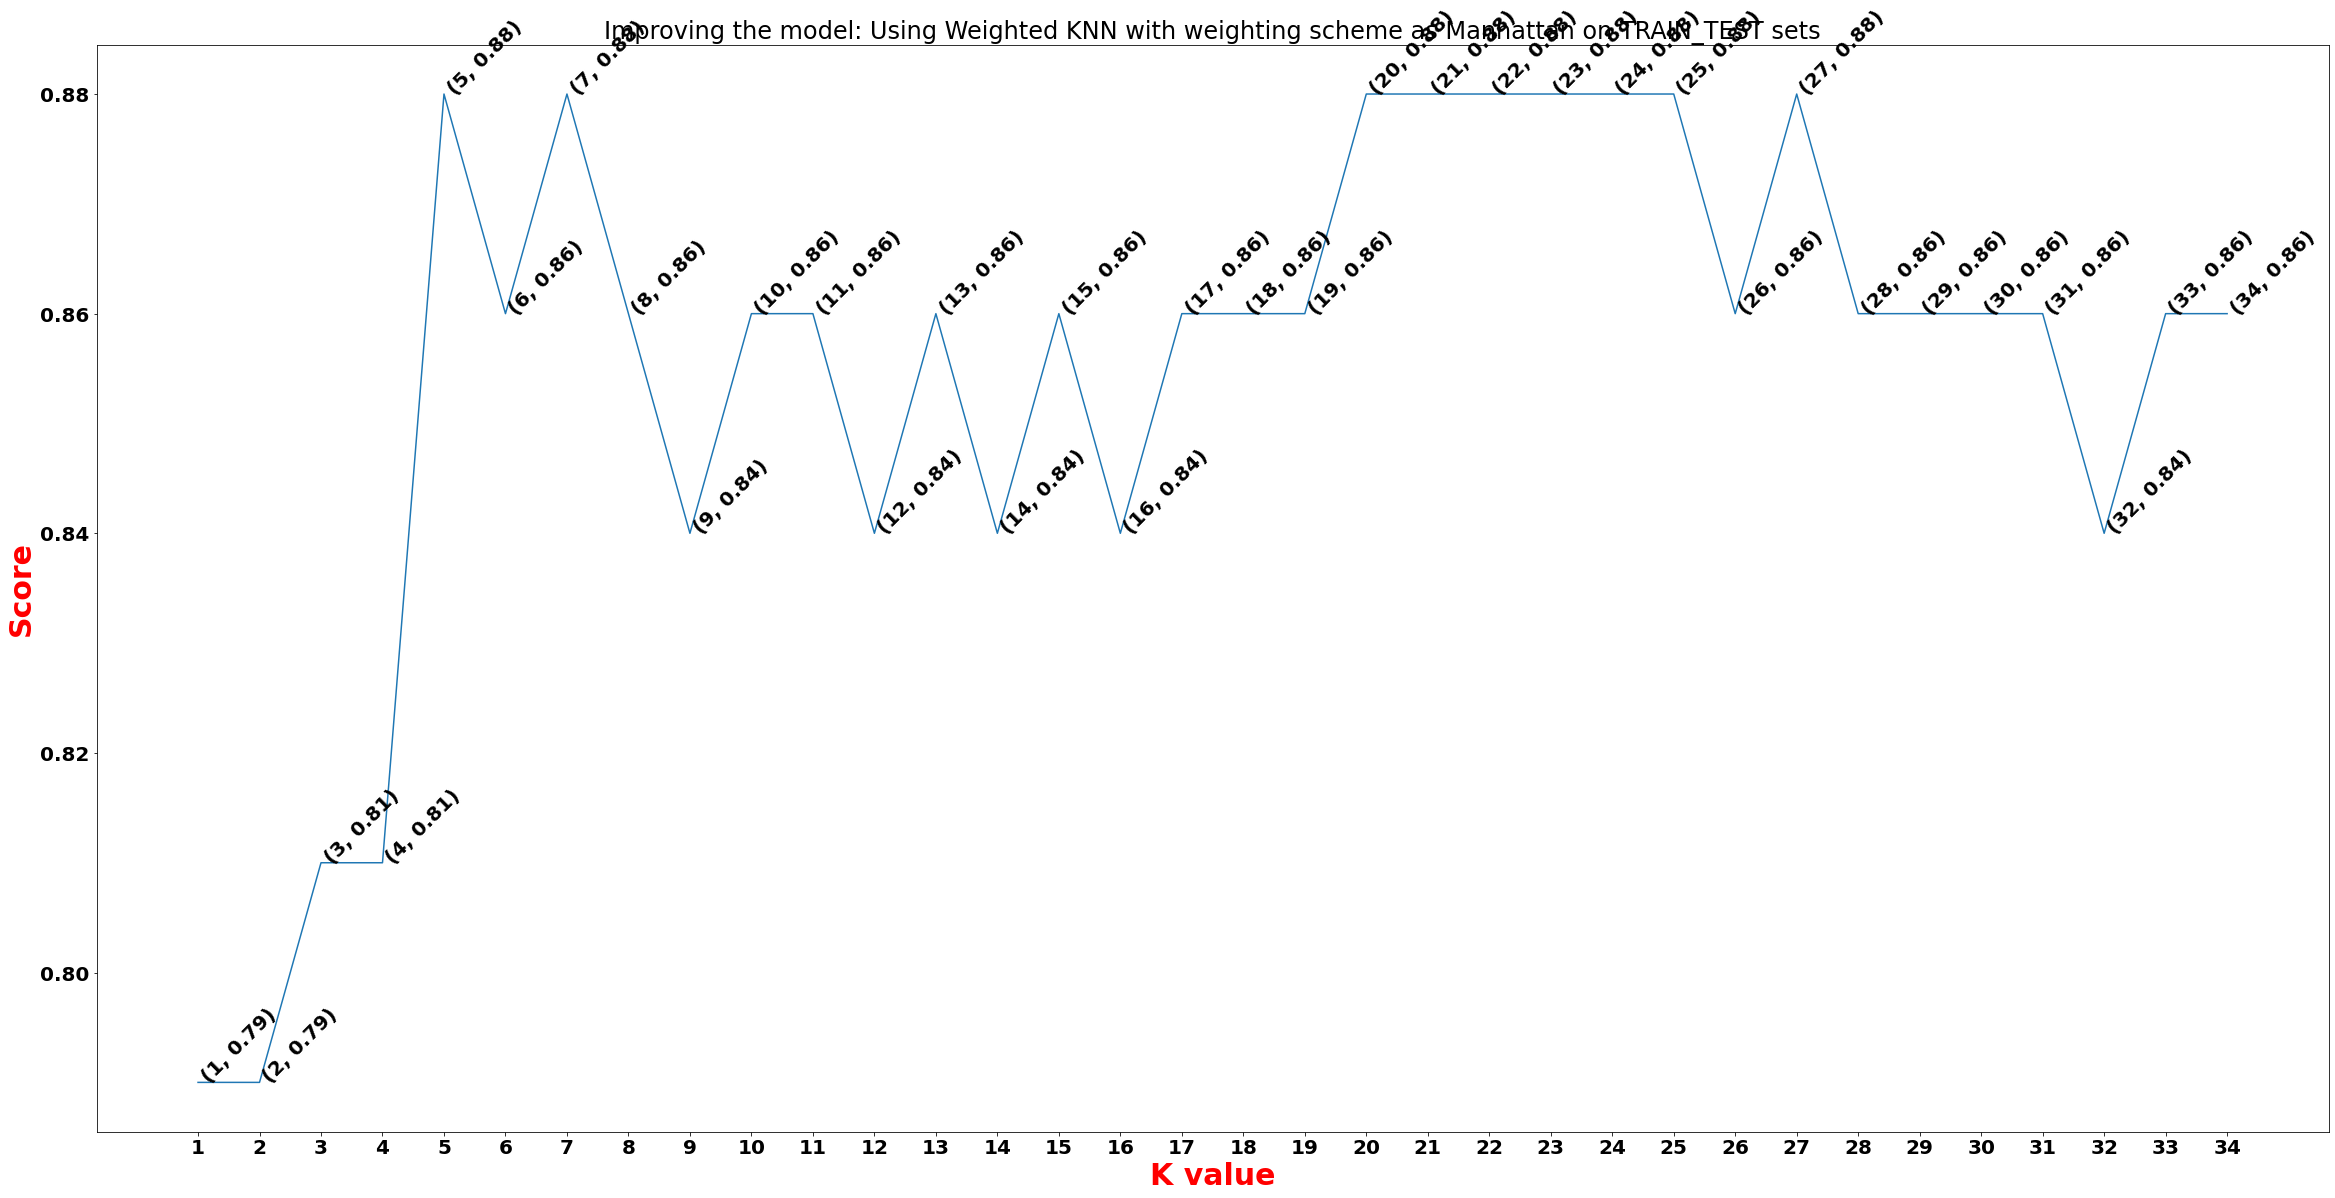

[0.79, 0.79, 0.81, 0.81, 0.88, 0.86, 0.88, 0.86, 0.84, 0.86, 0.86, 0.84, 0.86, 0.84, 0.86, 0.84, 0.86, 0.86, 0.86, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.86, 0.88, 0.86, 0.86, 0.86, 0.86, 0.84, 0.86, 0.86]


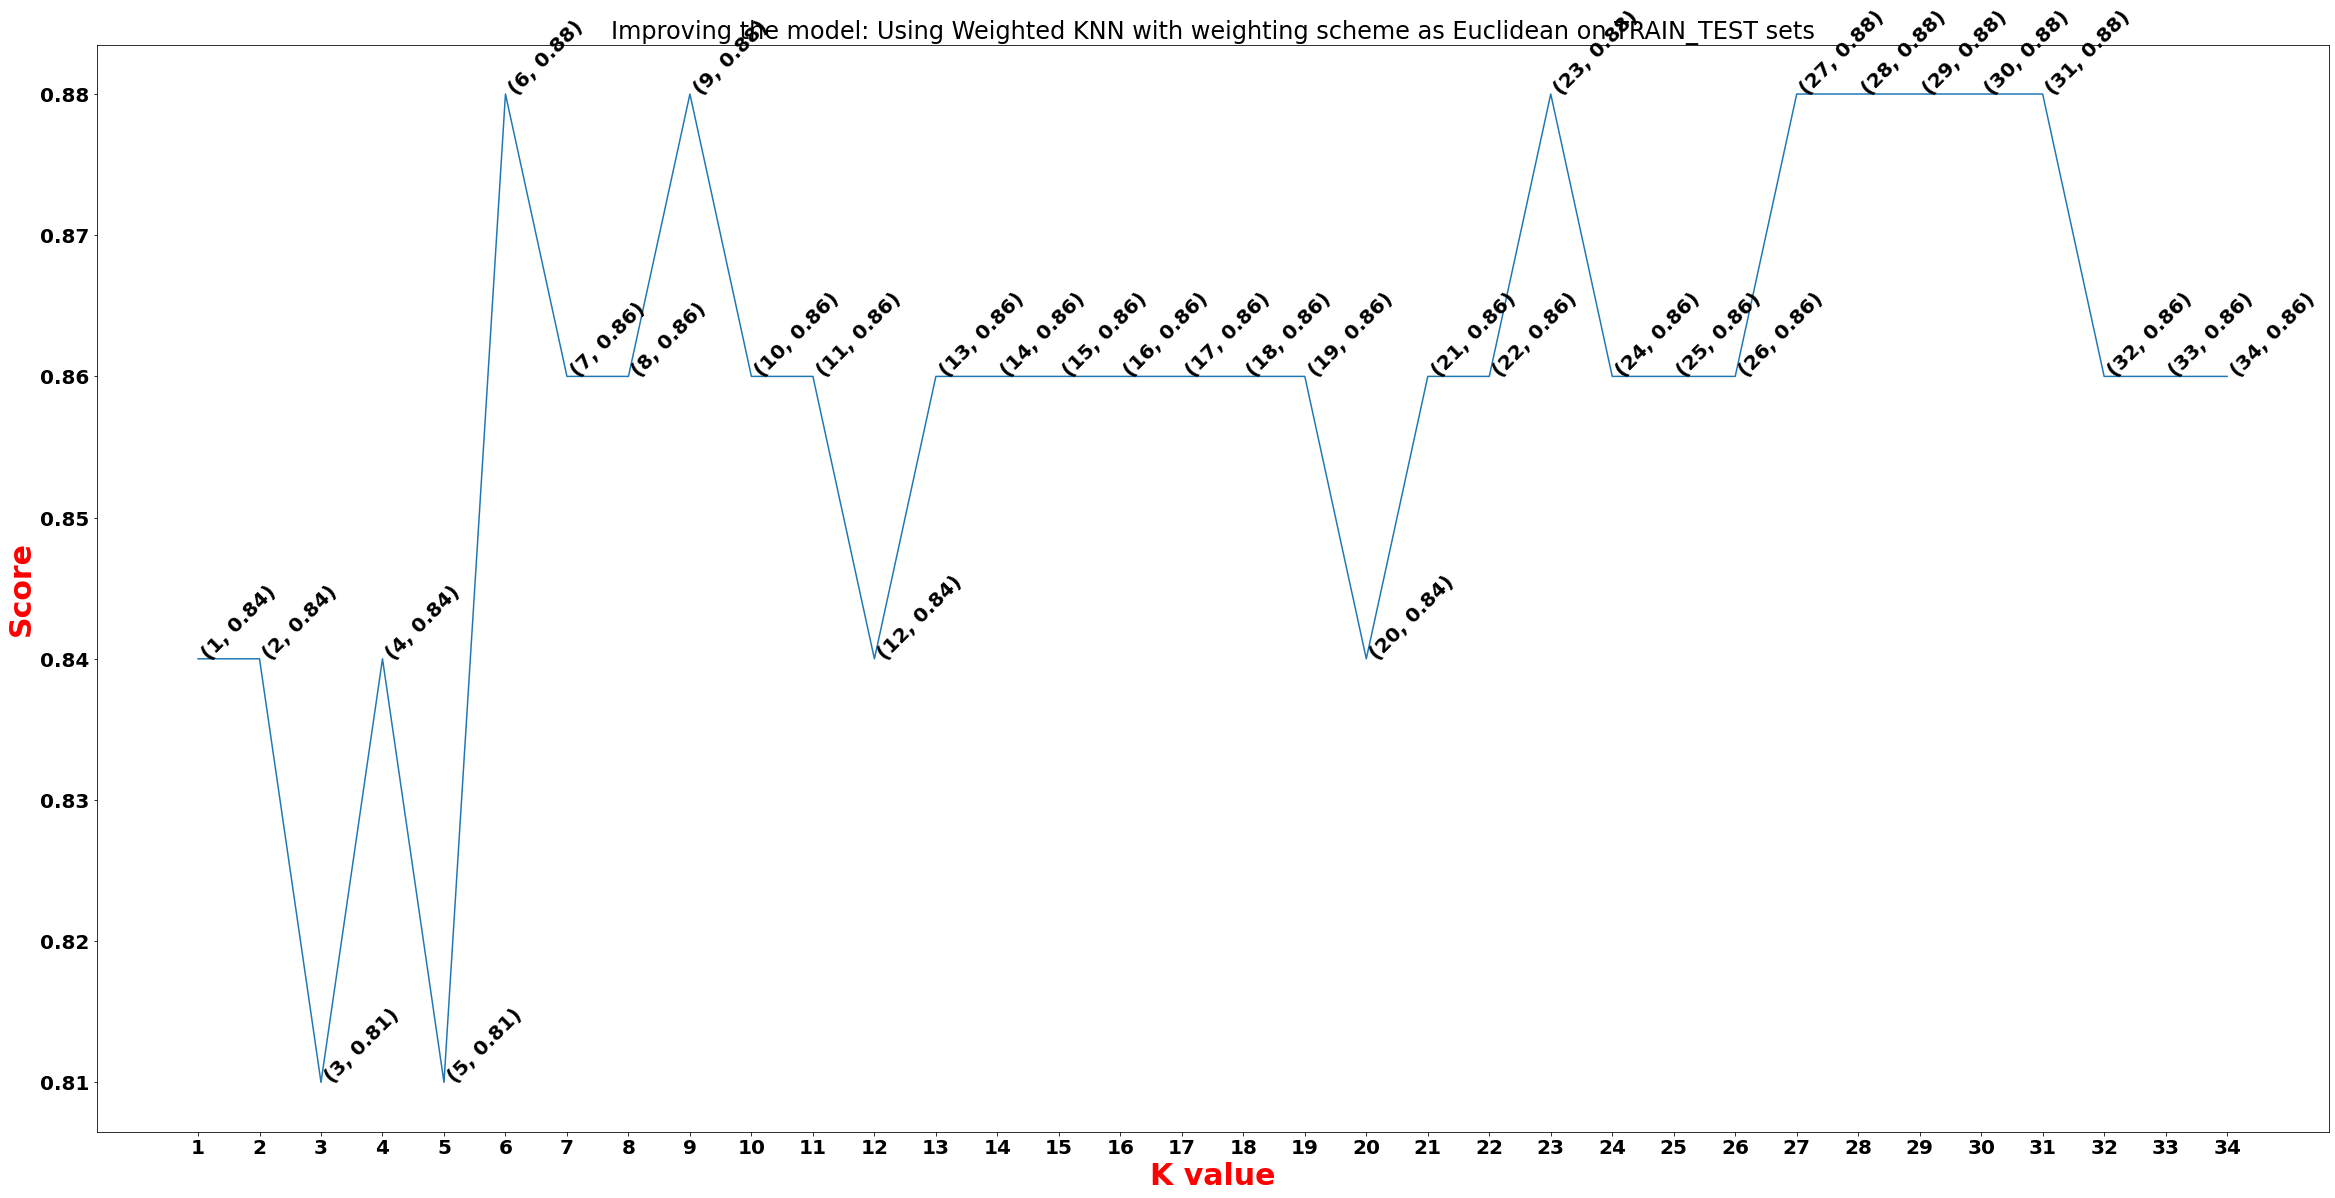

[0.84, 0.84, 0.81, 0.84, 0.81, 0.88, 0.86, 0.86, 0.88, 0.86, 0.86, 0.84, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.84, 0.86, 0.86, 0.88, 0.86, 0.86, 0.86, 0.88, 0.88, 0.88, 0.88, 0.88, 0.86, 0.86, 0.86]


In [ ]:
##--------Using Weighted KNN with weighting scheme as Manhattan -----------##

# Training the classifier on Training set using knn classifier with weighted knn and manhattan weighting scheme.
knn_scores = []
for k in range(1,35):
    knn4 = KNeighborsClassifier(n_neighbors = k, weights='distance', metric='manhattan')
    knn4.fit(x_train, y_train)
    y_pred =  knn4.predict(x_test)
    knn_scores.append(accuracy_score(y_test, y_pred))
    
knn_scores = [ '%.2f' % elem for elem in knn_scores ]
knn_scores = [float(line) for line in knn_scores]
plt.rc('font', size=20)
f, ax = plt.subplots(1, 1, figsize = (40, 20))
plt.plot(range(1,35), knn_scores)
for i in range(1,35):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]), fontsize=20, rotation=45 )
plt.xticks(np.arange(1,35,1))
plt.title("Improving the model: Using Weighted KNN with weighting scheme as Manhattan on TRAIN_TEST sets")
plt.xlabel("K value",color='Red',weight='bold',fontsize='30')
plt.ylabel("Score",color='Red',weight='bold',fontsize='30')
plt.show()
plt.rcParams["font.weight"]= "bold"
plt.rcParams["axes.labelweight"] = "bold"
print(knn_scores)

##--------Using Weighted KNN with weighting scheme as Euclidean -----------##

# Training the classifier on Training set using knn classifier with weighted knn and Euclidean weighting scheme.
knn_scores = []
for k in range(1,35):
    knn5 = KNeighborsClassifier(n_neighbors = k, weights='distance', metric='euclidean')
    knn5.fit(x_train, y_train)
    y_pred =  knn5.predict(x_test)
    knn_scores.append(accuracy_score(y_test, y_pred))
    
knn_scores = [ '%.2f' % elem for elem in knn_scores ]
knn_scores = [float(line) for line in knn_scores]
plt.rc('font', size=20)
f, ax = plt.subplots(1, 1, figsize = (40, 20))
plt.plot(range(1,35), knn_scores)
for i in range(1,35):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]), fontsize=20, rotation=45 )
plt.xticks(np.arange(1,35,1))
plt.title("Improving the model: Using Weighted KNN with weighting scheme as Euclidean on TRAIN_TEST sets")
plt.xlabel("K value",color='Red',weight='bold',fontsize='30')
plt.ylabel("Score",color='Red',weight='bold',fontsize='30')
plt.show()
plt.rcParams["font.weight"]= "bold"
plt.rcParams["axes.labelweight"] = "bold"
print(knn_scores)

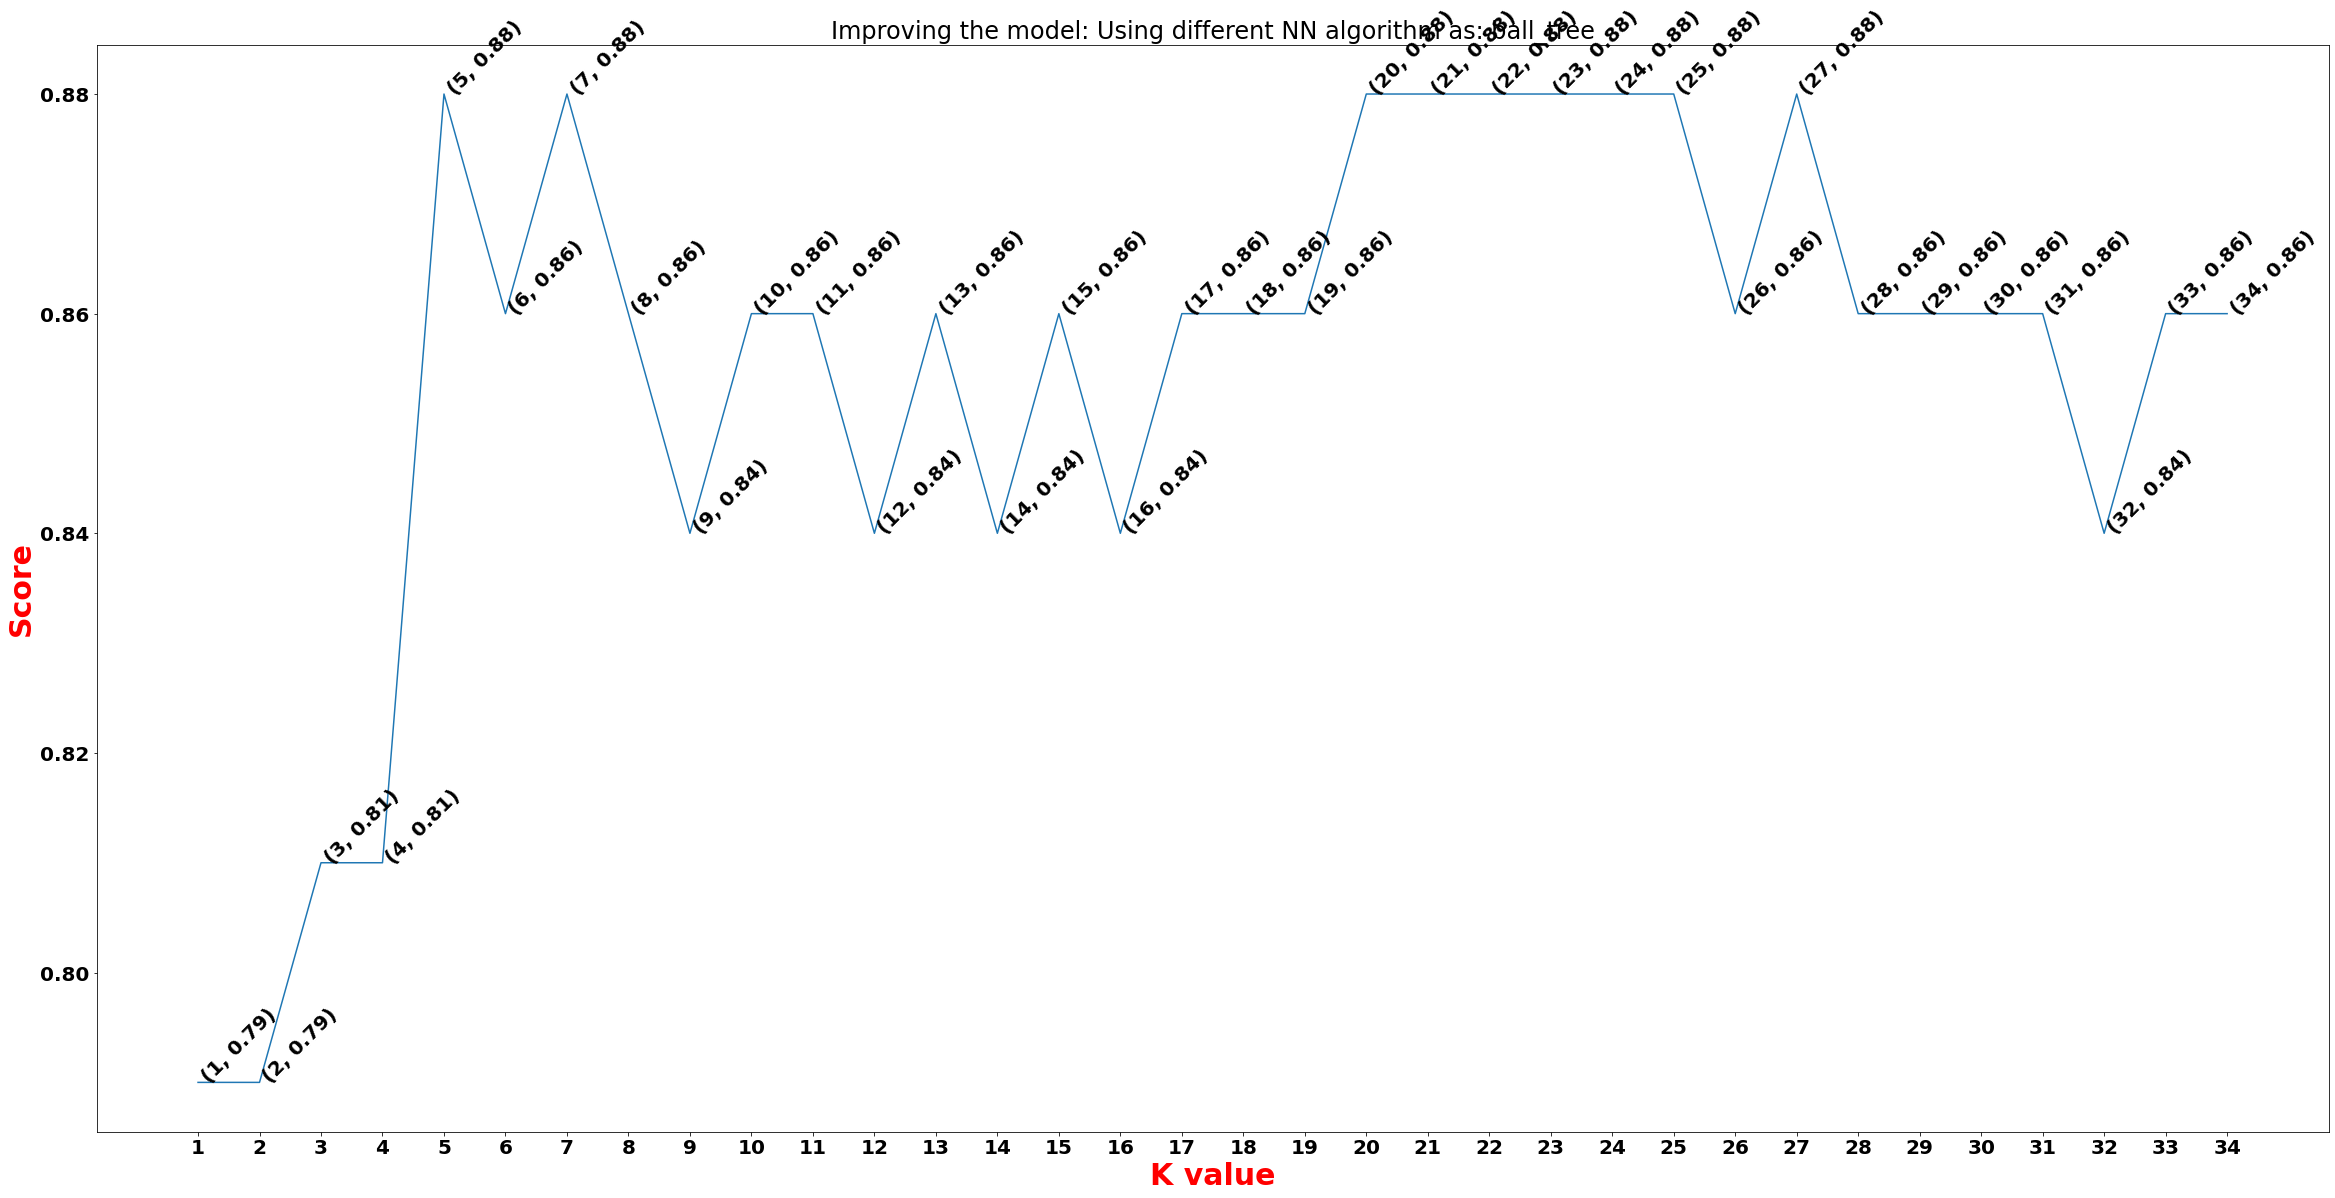

[0.79, 0.79, 0.81, 0.81, 0.88, 0.86, 0.88, 0.86, 0.84, 0.86, 0.86, 0.84, 0.86, 0.84, 0.86, 0.84, 0.86, 0.86, 0.86, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.86, 0.88, 0.86, 0.86, 0.86, 0.86, 0.84, 0.86, 0.86]


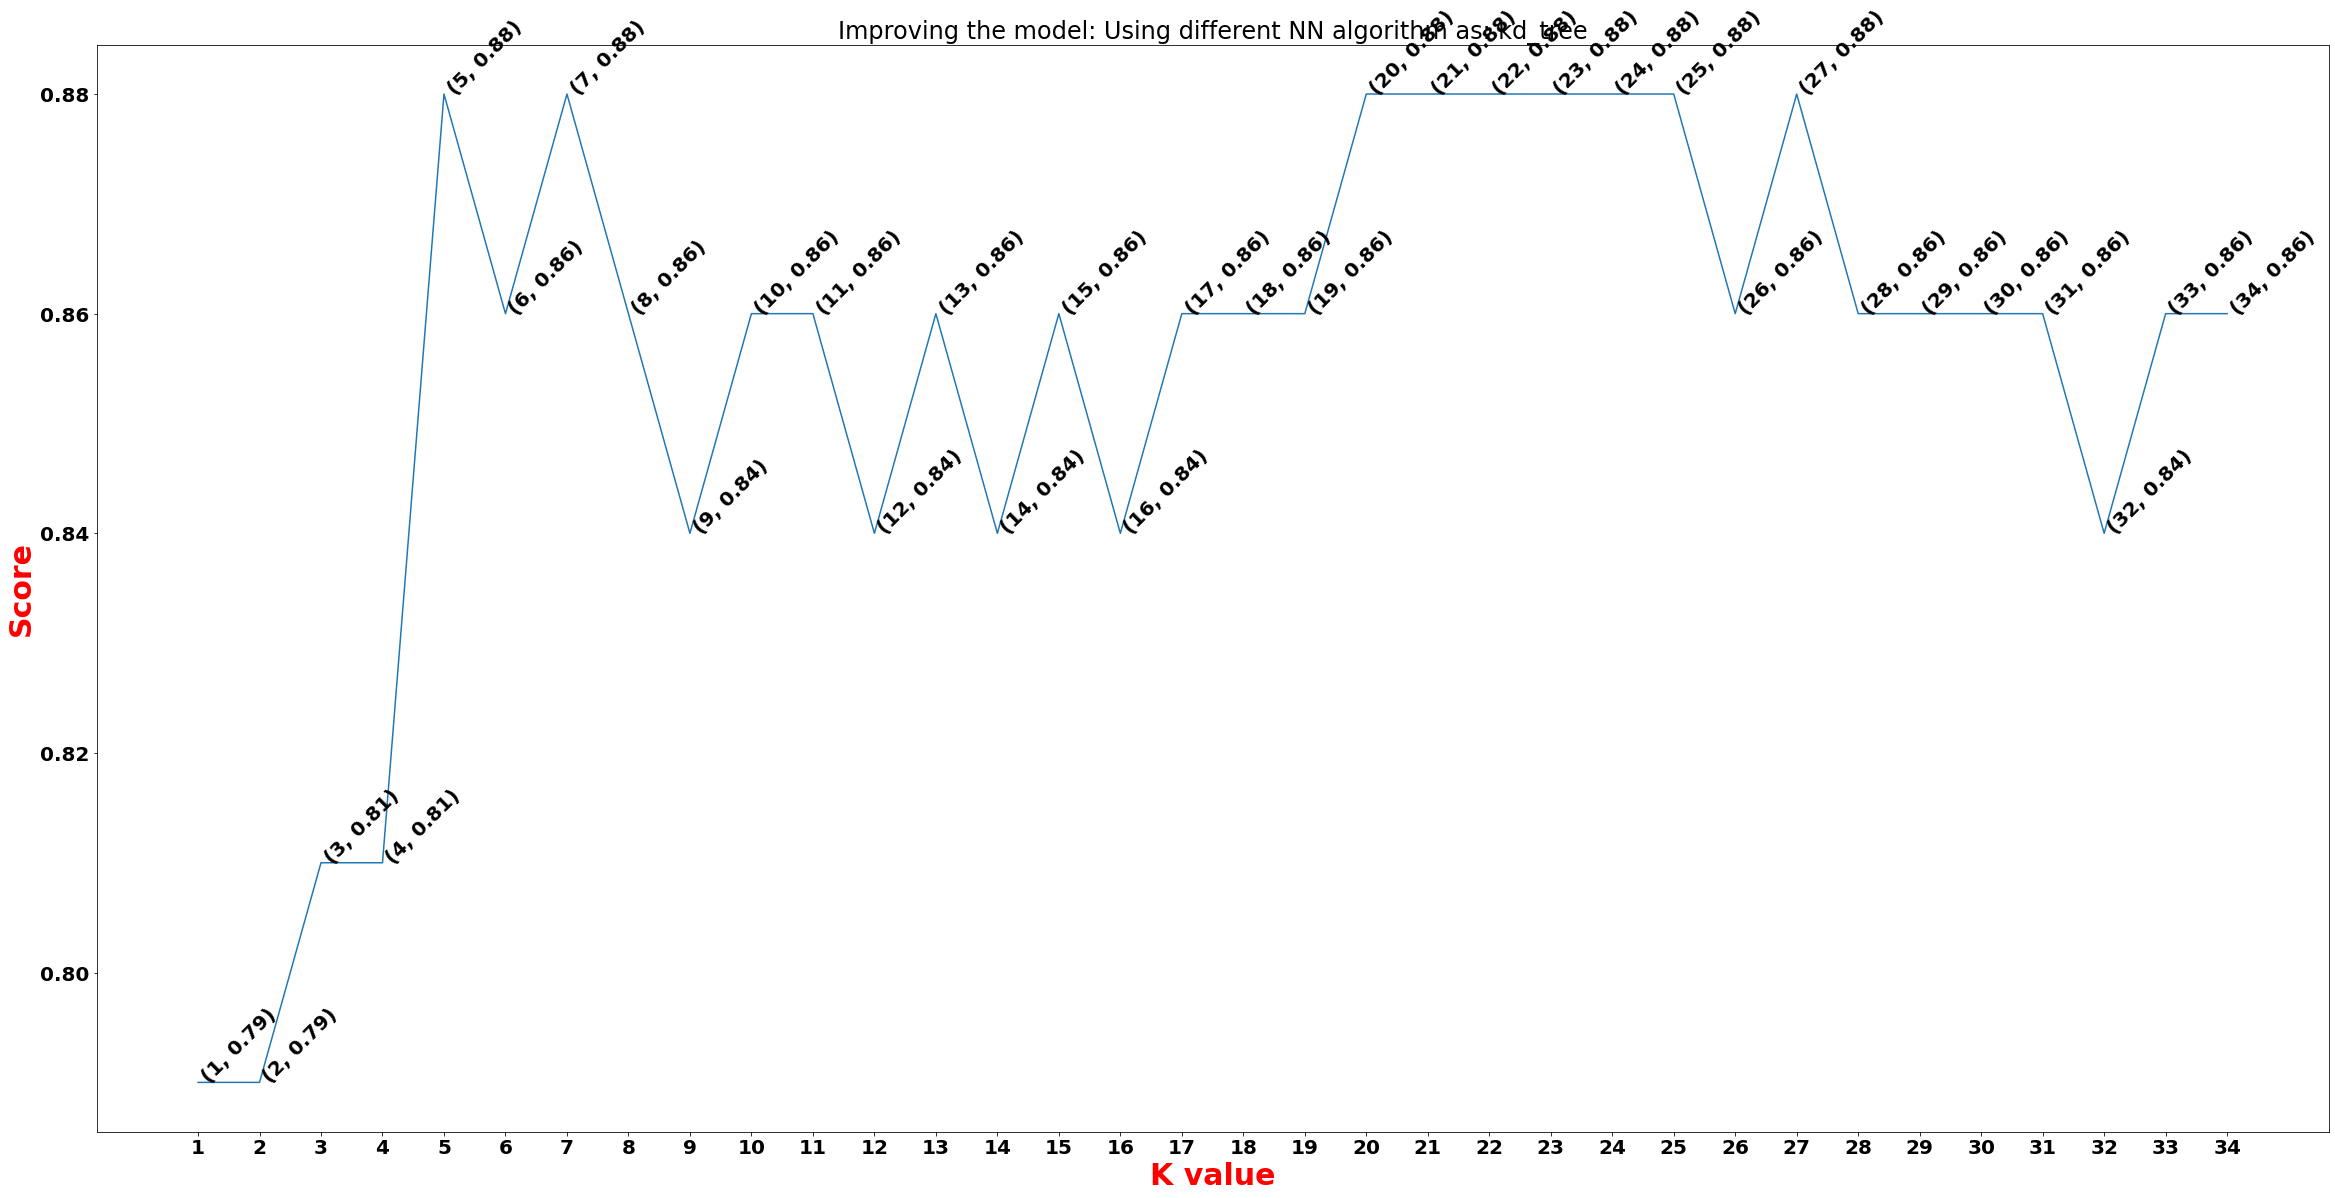

[0.79, 0.79, 0.81, 0.81, 0.88, 0.86, 0.88, 0.86, 0.84, 0.86, 0.86, 0.84, 0.86, 0.84, 0.86, 0.84, 0.86, 0.86, 0.86, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.86, 0.88, 0.86, 0.86, 0.86, 0.86, 0.84, 0.86, 0.86]


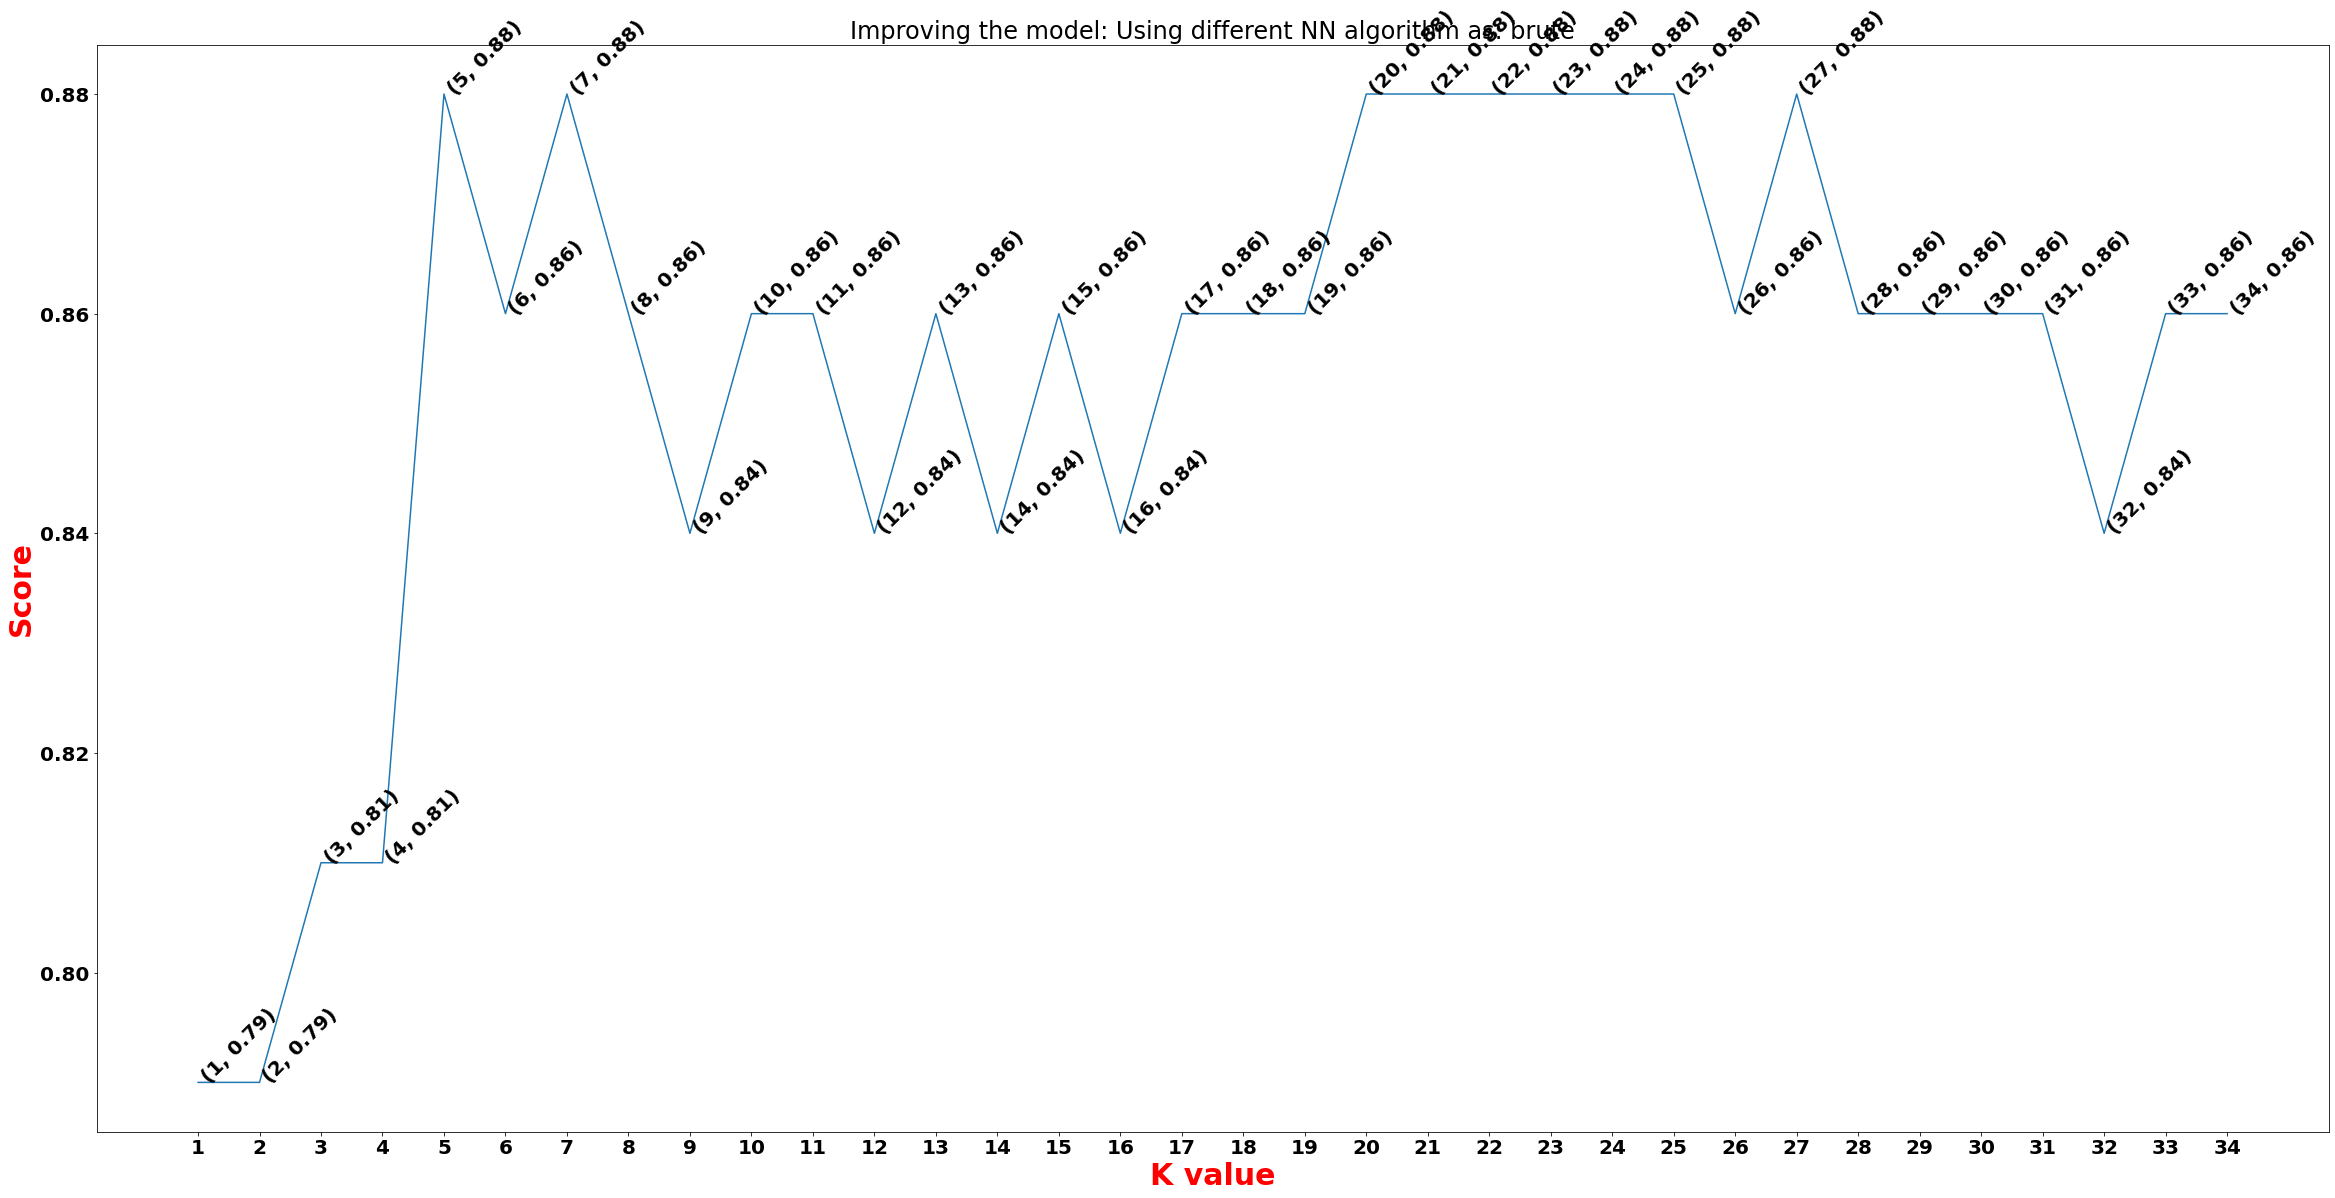

[0.79, 0.79, 0.81, 0.81, 0.88, 0.86, 0.88, 0.86, 0.84, 0.86, 0.86, 0.84, 0.86, 0.84, 0.86, 0.84, 0.86, 0.86, 0.86, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.86, 0.88, 0.86, 0.86, 0.86, 0.86, 0.84, 0.86, 0.86]


In [ ]:
##--------Using different NN algorithms and weighting scheme as Manhattan-----------##
# storing names of all the algorithms in algo list.
algo = ['ball_tree', 'kd_tree', 'brute']
for a in range(len(algo)):
    knn_scores = []
    for k in range(1,35):
        knn6 = KNeighborsClassifier(n_neighbors = k, algorithm=algo[a], weights='distance', metric='manhattan')
        knn6.fit(x_train, y_train)
        y_pred =  knn6.predict(x_test)
        knn_scores.append(accuracy_score(y_test, y_pred))

    knn_scores = [ '%.2f' % elem for elem in knn_scores ]
    knn_scores = [float(line) for line in knn_scores]
    plt.rc('font', size=20)
    f, ax = plt.subplots(1, 1, figsize = (40, 20))
    plt.plot(range(1,35), knn_scores)
    for i in range(1,35):
        plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]), fontsize=20, rotation=45 )
    plt.xticks(np.arange(1,35,1))
    title = "Improving the model: Using different NN algorithm as: " + algo[a]
    plt.title(title)
    plt.xlabel("K value",color='Red',weight='bold',fontsize='30')
    plt.ylabel("Score",color='Red',weight='bold',fontsize='30')
    plt.show()
    plt.rcParams["font.weight"]= "bold"
    plt.rcParams["axes.labelweight"] = "bold"
    print(knn_scores)

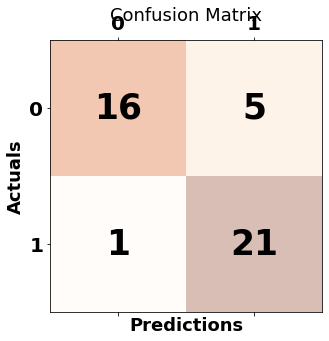

In [ ]:
# Choosing algorithm = brute for calculating the AUC, f-score and other.
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large') 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

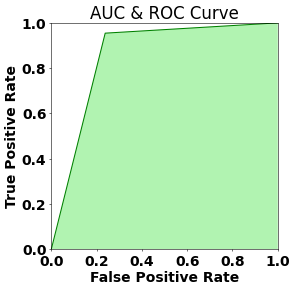

Precision: 0.808
F1 Score: 0.875
Accuracy: 0.860
Recall: 0.955
AUC: 0.858


In [ ]:
#AUC and ROC Curve
auc = metrics.roc_auc_score(y_test, y_pred)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)
plt.figure(figsize=(6, 6), dpi=50)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#Accuracy, Precision, Recall & F1-Score
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('AUC: %.3f' % auc)
